**Imported all required libraries**

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Getting the dataset**

In [6]:
# Load Data
df = pd.read_csv("/content/NFLX.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True).dt.strftime('%m-%d-%Y')
df.set_index("Date", inplace=True)

**Here, I used the column named "Close price" for prediction purpose**

In [7]:
# Use Close price for prediction
scaler = MinMaxScaler()
data = scaler.fit_transform(df[["Close"]])

In [8]:
# Prepare sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(data, seq_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

**Build the LSTM Model**

In [9]:
# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Actual Training of the model Begins**

In [10]:
# Train Model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0382 - val_loss: 0.0064
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0021 - val_loss: 0.0058
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0020 - val_loss: 0.0069
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0024 - val_loss: 0.0046
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0017 - val_loss: 0.0043
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0021 - val_loss: 0.0037
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 12/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0

**Predicted the result and apply here *Inverse Transform* to get result in a desired way**

In [11]:
# Predict and Inverse Transform
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


**Visualize the predicted output**

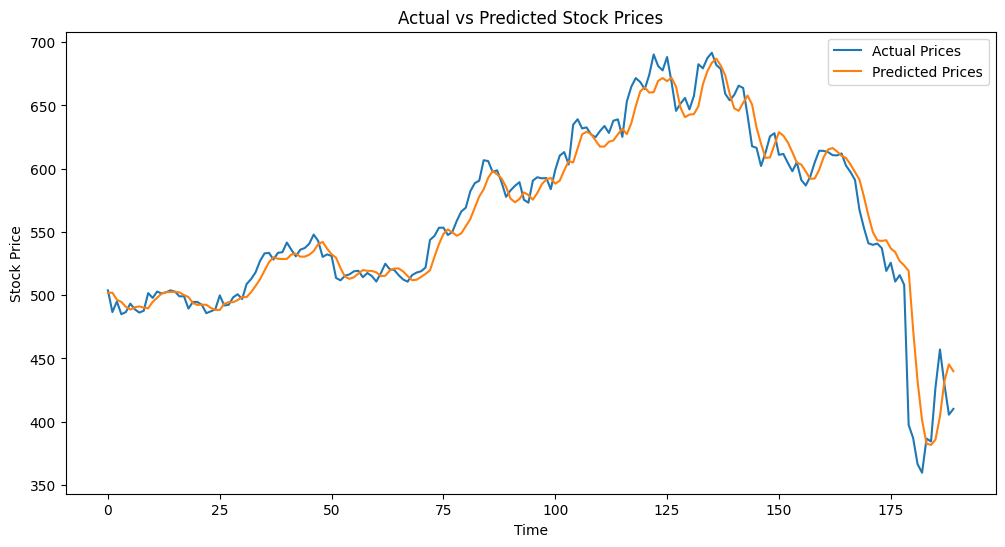

In [13]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual Prices")
plt.plot(y_pred, label="Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.show()